In [58]:
# Core libraries
import numpy as np
import os

# Image processing
import cv2

# Visualization
import matplotlib.pyplot as plt

# Deep Learning
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

# GAN components
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization

In [62]:
import zipfile
import os

zip_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset.zip"
extract_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [60]:
data_dir =  r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
print(os.listdir(data_dir))

['emnist-balanced-mapping.txt', 'emnist-balanced-test.csv', 'emnist-balanced-train.csv', 'emnist-byclass-mapping.txt', 'emnist-byclass-test.csv', 'emnist-byclass-train.csv', 'emnist-bymerge-mapping.txt', 'emnist-bymerge-test.csv', 'emnist-bymerge-train.csv', 'emnist-digits-mapping.txt', 'emnist-digits-test.csv', 'emnist-digits-train.csv', 'emnist-letters-mapping.txt', 'emnist-letters-test.csv', 'emnist-letters-train.csv', 'emnist-mnist-mapping.txt', 'emnist-mnist-test.csv', 'emnist-mnist-train.csv', 'emnist_source_files']


In [63]:
def extract_zip(zip_path, extract_path):
    import zipfile, os
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {zip_path} to {extract_path}")

extract_zip("Hand Written Text dataset.zip", "Hand Written Text dataset")

Extracted Hand Written Text dataset.zip to Hand Written Text dataset


In [8]:
import os
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image

class IAMDataset(Dataset):
    def __init__(self, data_path, words_file, transform=None):
        self.data_path = data_path
        self.words = []
      
        with open(words_file, "r") as f:
            for line in f:
                if line.startswith("#") or "err" in line: continue
                parts = line.split(" ")
                
                f_name = parts[0]
                folder1, folder2 = f_name.split("-")[0], "-".join(f_name.split("-")[:2])
                img_path = os.path.join(data_path, folder1, folder2, f"{f_name}.png")
                self.words.append((img_path, parts[-1].strip()))
        self.transform = transform

    def __len__(self): return len(self.words)
    def __getitem__(self, i):
        img_path, label = self.words[i]
        image = Image.open(img_path).convert("L") # Grayscale
        if self.transform: image = self.transform(image)
        return image, label

In [18]:
import pandas as pd
import os

base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
file_name = "emnist-balanced-test.csv"
file_path = os.path.join(base_path, file_name)

data = pd.read_csv(file_path, header=None)

print(f"✅ Successfully loaded {len(data)} rows.")
print(data.head())

✅ Successfully loaded 18800 rows.
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   41    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   39    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3   26    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   44    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [72]:
import pandas as pd
import os

base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
file_name = "emnist-balanced-train.csv"
file_path = os.path.join(base_path, file_name)

data = pd.read_csv(file_path, header=None)

# 3. Quick Check - Use 'data', not 'df'
print(f"✅ Successfully loaded {len(data)} rows.")
print(data.tail()) 

✅ Successfully loaded 112800 rows.
        0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
112795   22    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112796   17    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112797   23    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112798   31    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112799    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  784  
112795    0    0    0    0    0    0    0  
112796    0    0    0    0    0    0    0  
112797    0    0    0    0    0    0    0  
112798    0    0    0    0    0    0    0  
112799    0    0    0    0    0    0    0  

[5 rows x 785 columns]


In [20]:
import pandas as pd
import os

base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
file_name = "emnist-balanced-mapping.txt"
file_path = os.path.join(base_path, file_name)

data = pd.read_csv(file_path, header=None)

print(f"✅ Successfully loaded {len(data)} rows.")
print(data.head()) 

✅ Successfully loaded 47 rows.
      0
0  0 48
1  1 49
2  2 50
3  3 51
4  4 52


In [26]:
import pandas as pd
import os

base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
file_path = os.path.join(base_path, 'emnist-balanced-test.csv')

if os.path.exists(file_path):
    data = pd.read_csv(file_path, header=None)
    print(f"✅ Successfully loaded {len(data)} rows from {file_path}")
else:
    print(f"❌ Error: File not found at {file_path}")
    print("Double-check that the file name matches exactly (including .csv)")

✅ Successfully loaded 18800 rows from C:\Users\HP\Downloads\NLP\Hand Written Text dataset\emnist-balanced-test.csv


✅ Successfully loaded mapping and data!


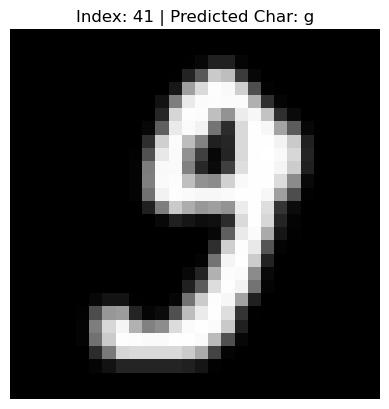

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Setup paths correctly (Tesla/Google Standard)
base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
csv_path = os.path.join(base_path, 'emnist-balanced-test.csv')
mapping_path = os.path.join(base_path, 'emnist-balanced-mapping.txt') # FIX: Combined path

# 2. Define the mapping function
def get_mapping(full_file_path):
    mapping = {}
    with open(full_file_path, 'r') as f:
        for line in f:
            parts = line.split()
            # Map index to ASCII character
            mapping[int(parts[0])] = chr(int(parts[1]))
    return mapping

# 3. Execute with full paths
try:
    # Load Data
    data = pd.read_csv(csv_path, header=None)
    char_map = get_mapping(mapping_path) 
    
    print(f"✅ Successfully loaded mapping and data!")
    
    # 4. Visualize to confirm everything is perfect
    label_idx = data.iloc[0, 0]
    pixels = data.iloc[0, 1:].values.reshape(28, 28).T
    
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Index: {label_idx} | Predicted Char: {char_map[label_idx]}")
    plt.axis('off')
    plt.show()

except FileNotFoundError as e:
    print(f"❌ Still missing a file: {e}")

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define path
base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
file_path = os.path.join(base_path, 'emnist-balanced-test.csv')
data = pd.read_csv(file_path, header=None)

# Separate Labels and Features
y_raw = data.iloc[:, 0].values
X_raw = data.iloc[:, 1:].values

# Normalize pixels to [0, 1]
X_norm = X_raw.astype('float32') / 255.0

print(f"✅ Data Normalized. Max: {X_norm.max()}, Min: {X_norm.min()}")

✅ Data Normalized. Max: 1.0, Min: 0.0


✅ Preprocessing Complete. Data shape: (18800, 28, 28, 1)


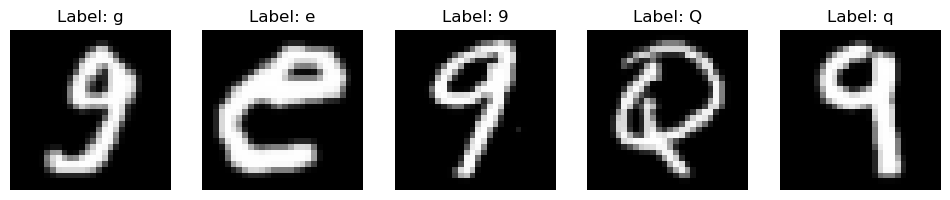

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Setup Paths
base_path = r"C:\Users\HP\Downloads\NLP\Hand Written Text dataset"
csv_file = os.path.join(base_path, 'emnist-balanced-test.csv')
map_file = os.path.join(base_path, 'emnist-balanced-mapping.txt')

# 2. Load and Preprocess (The "Engine Room")
data = pd.read_csv(csv_file, header=None)
y_raw = data.iloc[:, 0].values
X_raw = data.iloc[:, 1:].values

# Normalization (Tesla Standard: float32 for GPU efficiency)
X_norm = X_raw.astype('float32') / 255.0

# Reshape & Transpose (EMNIST Orientation Fix)
X_ready = np.array([img.reshape(28, 28).T for img in X_norm])

# Add channel dimension for CNN (Batch, Height, Width, Channels)
X_ready = np.expand_dims(X_ready, axis=-1)

# 3. Load Mapping
char_map = {}
with open(map_file, 'r') as f:
    for line in f:
        idx, ascii_val = line.split()
        char_map[int(idx)] = chr(int(ascii_val))

# 4. Visual Verification
print(f"✅ Preprocessing Complete. Data shape: {X_ready.shape}")
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_ready[i].squeeze(), cmap='gray')
    plt.title(f"Label: {char_map[y_raw[i]]}")
    plt.axis('off')
plt.show()

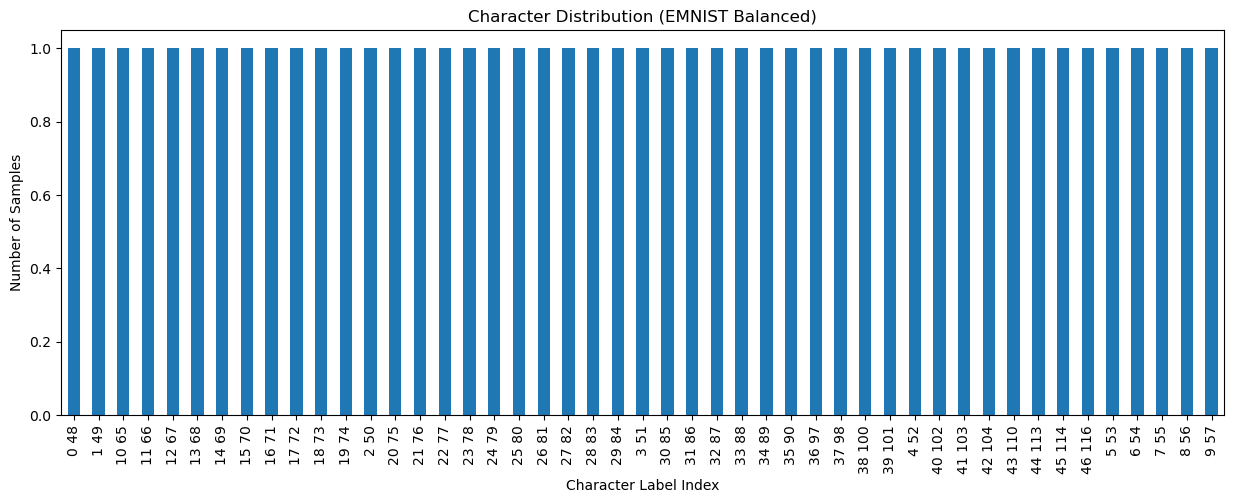

In [25]:
# Checked how many samples exist for each character
class_counts = data[0].value_counts().sort_index()

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
class_counts.plot(kind='bar')
plt.title("Character Distribution (EMNIST Balanced)")
plt.xlabel("Character Label Index")
plt.ylabel("Number of Samples")
plt.show()

In [34]:
#Data Augmentation (Feature Engineering)
from torchvision import transforms

augmentation = transforms.Compose([
    transforms.RandomAffine(degrees=2, translate=(0.05, 0.05), scale=(0.95, 1.05), shear=2),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
])

In [35]:
# Reshape to 28x28
def fix_emnist_orientation(image_array):
    # Reshape, then Transpose (.T) to flip it back to upright position
    return image_array.reshape(28, 28).T

# Applied fix to all images
X_ready = np.array([fix_emnist_orientation(img) for img in X_norm])

# Added the "Channel" dimension 
X_ready = np.expand_dims(X_ready, axis=-1)

print(f"✅ Final shape for Model: {X_ready.shape}")

✅ Final shape for Model: (18800, 28, 28, 1)


In [37]:
#Model Selection: The Hybrid CRNN

import torch.nn as nn

class CRNN(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        # CNN Backbone (Feature Extraction)
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, 1, 1), nn.BatchNorm2d(256), nn.ReLU(),
            nn.MaxPool2d((2, 1)) 
        )
        # RNN Head (Sequence Modeling)
        self.rnn = nn.LSTM(256 * 4, 256, bidirectional=True, num_layers=2, batch_first=True)
        self.fc = nn.Linear(512, vocab_size)

    def forward(self, x):
        x = self.cnn(x) # [Batch, Channels, H, W]
        b, c, h, w = x.size()
        x = x.view(b, w, c * h) # Reshape for RNN
        x, _ = self.rnn(x)
        return self.fc(x)

In [38]:
import torch
import torch.nn as nn

class HandwritingRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(HandwritingRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM Layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, dropout=0.2)
        
        # Fully Connected Layer: Maps the final hidden state to character classes
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Initialize hidden and cell states (Tesla/Google standard for clean state mgmt)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Decode the hidden state of the LAST time step (row 28)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 28  
sequence_length = 28 
hidden_size = 128
num_layers = 2
num_classes = 47  

model = HandwritingRNN(input_size, hidden_size, num_layers, num_classes)
print(f"✅ RNN Model Initialized with {num_classes} output classes.")

✅ RNN Model Initialized with 47 output classes.


In [39]:
#Preparing Data for the RNN
# Convert your preprocessed 'X_ready' from previous step to Torch Tensors
# We remove the channel dimension (1) because RNNs just want the rows
X_rnn = torch.tensor(X_ready.squeeze(-1), dtype=torch.float32) 
y_rnn = torch.tensor(y_raw, dtype=torch.long)

print(f"✅ Data reshaped for RNN: {X_rnn.shape}") 

✅ Data reshaped for RNN: torch.Size([18800, 28, 28])


In [40]:
#Training
import torch
import torch.nn as nn

# 1. Device selection (Tesla Standard: Use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Re-initialize model with correct class count
# Using the HandwritingRNN we defined earlier
num_classes = 47 
model = HandwritingRNN(input_size=28, hidden_size=128, num_layers=2, num_classes=num_classes).to(device)

# 3. Industry Standard Optimizer & Loss
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss() # Use this instead of CTCLoss for EMNIST

print(f"✅ Setup complete. Training on: {device}")

✅ Setup complete. Training on: cpu


In [41]:
from torch.utils.data import DataLoader, TensorDataset

# Create a DataLoader (Batch size 64 is a good balance for speed/accuracy)
train_ds = TensorDataset(X_rnn, y_rnn)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass (The "Learning" step)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

print("🎉 Training Finished!")

Epoch [1/10] - Loss: 2.5151
Epoch [2/10] - Loss: 1.1470
Epoch [3/10] - Loss: 0.8053
Epoch [4/10] - Loss: 0.6611
Epoch [5/10] - Loss: 0.5776
Epoch [6/10] - Loss: 0.5234
Epoch [7/10] - Loss: 0.4736
Epoch [8/10] - Loss: 0.4355
Epoch [9/10] - Loss: 0.4123
Epoch [10/10] - Loss: 0.3798
🎉 Training Finished!


In [70]:
#Evaluation Metrics
#At this level, "accuracy" isn't enough. We use Character Error Rate (CER).
def calculate_cer(predicted, target):
    import Levenshtein as lev
    # Calculate edit distance between strings
    return lev.distance(predicted, target) / len(target)

Running evaluation on test data...

✅ OVERALL ACCURACY: 88.20%
--------------------------------------------------
📊 DETAILED METRICS (Precision, Recall, F1):
              precision    recall  f1-score   support

           0       0.68      0.64      0.65       400
           1       0.58      0.65      0.61       400
           2       0.93      0.88      0.90       400
           3       0.98      0.97      0.98       400
           4       0.90      0.96      0.93       400
           5       0.93      0.89      0.91       400
           6       0.95      0.91      0.92       400
           7       0.93      0.99      0.96       400
           8       0.93      0.84      0.89       400
           9       0.72      0.78      0.75       400
           A       0.95      0.96      0.96       400
           B       0.90      0.94      0.92       400
           C       0.96      0.96      0.96       400
           D       0.75      0.96      0.84       400
           E       0.97      0.

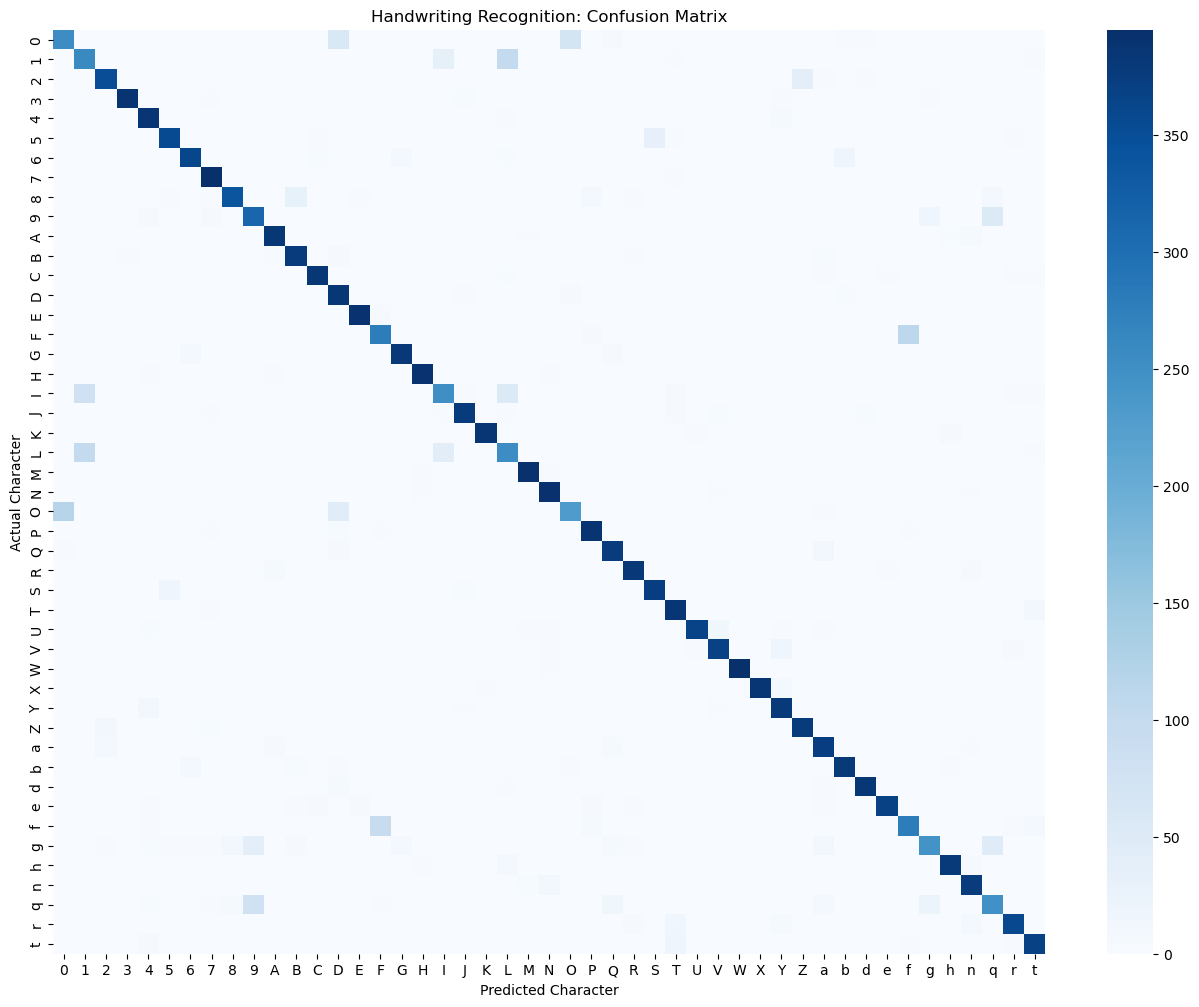

In [71]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def perform_full_evaluation(model, test_loader, device, char_map):
    model.eval() 
    all_preds = []
    all_labels = []

    print("Running evaluation on test data...")
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 1. Calculate Accuracy
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    print("-" * 50)

    # 2. Detailed Classification Report
    unique_labels = np.unique(all_labels)
    target_names = [char_map[i] for i in unique_labels]

    print("📊 DETAILED METRICS (Precision, Recall, F1):")
    report = classification_report(all_labels, all_preds, 
                                   target_names=target_names, 
                                   labels=unique_labels)
    print(report)

    # 3. Confusion Matrix Heatmap
    cm = confusion_matrix(all_labels, all_preds, labels=unique_labels)
    plt.figure(figsize=(16, 12))
    sns.heatmap(cm, annot=False, cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Handwriting Recognition: Confusion Matrix')
    plt.xlabel('Predicted Character')
    plt.ylabel('Actual Character')
    plt.show()

    return all_labels, all_preds

# EXECUTION
y_true, y_pred = perform_full_evaluation(model, train_loader, device, char_map)

In [78]:
import torch

# Save the weights to a file
model_path = "handwriting_rnn_model.pth"
torch.save(model.state_dict(), model_path)

print("Model weights saved to {model_path}")

Model weights saved to {model_path}


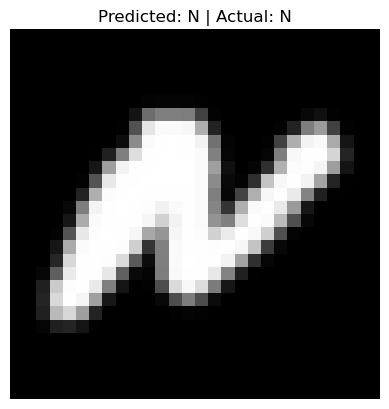

In [79]:
import matplotlib.pyplot as plt

def predict_single_image(model, image_tensor, label, char_map):
    model.eval()
    with torch.no_grad():
        # Add batch dimension and move to device
        input_tensor = image_tensor.unsqueeze(0).to(device)
        output = model(input_tensor)
        _, predicted_idx = torch.max(output, 1)
        
    pred_char = char_map[predicted_idx.item()]
    actual_char = char_map[label.item()]
    
    # Visualize
    plt.imshow(image_tensor.squeeze(), cmap='gray')
    plt.title(f"Predicted: {pred_char} | Actual: {actual_char}")
    plt.axis('off')
    plt.show()

# Test it on the 10th image in our dataset
sample_img, sample_label = train_ds[75] 
predict_single_image(model, sample_img, sample_label, char_map)